# 1. Computer Vision

## What is Computer Vision?

Computer Vision is how machines like smartphones or robotic system visually perceive the world and respond to it. It is modeled after human vision. 

A robot can gather data through **Cameras** and other sensors and then use the input to identify objects and safely move through its environment.

### Application of Computer Vision

- To focus camera in smartphone
- Photo tagging and face recognition
- In medical technology. i.e HealthTech
- AI system (Self driving car)

# 2. Image Representation and Classification

## Computer Vision Pipeline

A computer vision pipeline is a series of steps that most computer vision applications will go through. Many vision applications start off by acquiring images and data, then processing that data, performing some analysis and recognition steps, then finally performing an action. 

* Computer receives visual inputs from an imaging device like a camera as images or image frames
* Each frame is sent to some pre-processing steps to enhace quality and detail of the image.
* Image is then analysed by selecting area of interest.
* Feature extraction of the image
* Featured are then sent to a trained model to identify pattern in a certain image.

![Computer Vision Pipeline](./images/cvpipeline.PNG)

## Training a Model

Let's say you wanna train a model to recognize people's emotion: 
* You will feed thousand of images with different emotion (smile, happy, sad, smirk and so on.) called **Labelled image**, which we can compare to the **predicted output label** or recognition measurements.

* The neural network then monitors any errors it makes (by comparing the correct label to the output label) and corrects for them by modifying how it finds and prioritizes patterns and differences among the image data.

* A convolutional neural network learns to recognize and distinguish between images.

* At first train the model might not perform well but upon iteration, it does better.

* Gradient descent is a a mathematical way to minimize error in a neural network to bearest minimum.

## Image Formation

Image is the 2D represention of 3D object. Camera for snaping object works like the human eyes.

### Images as Numerical data

Treating images as grids of numbers is the basis for many image processing technique. Every pixel in an image is just a numerical value and, we can also change these pixel values. 

![Image Grid](./images/image_grid.PNG)

**For digital images, the top left corner is the origin.**

## Image Grid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib qt

In [2]:
# read the image
img = plt.imread('./images/car.jpg')

print("Image dimension", img.shape)

Image dimension (3888, 5184, 3)


In [3]:
# Convert image to grayscale

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

In [4]:
x = 190
y = 375

pixel_value = img[y,x]
print(pixel_value)

79


# 3. Color Image

Color images are interpreted as 3D cubic of values with width, height, and depth. The **depth** is the number of color channel. Most color images can be represented by combinations of only 3 colors: red, green, and blue values; these are known as RGB images.

![Color Images](./images/color_image.PNG)

### Color image Vs Grayscale
When you think of a classification challenge, like identifying lane lines or cars or people, you can decide whether color information and color images are useful by thinking about your own vision.

Color image is useful when:
1. Identify different type of traffic light 
2. Recognize an image

Grayscale image can be used when:
1. detect all pedestrain in image
2. reading a liscense plate.

## Color Thresholds

Color thresholding are used in computer vision application include extensively in computer graphics and video. A common use id with the *blue or green* screen. It is used to layer video stream based on identifying and replacing a large green area.

To change background of an image:
* define the upper and lower bond for colors to isolate.
* create a mask using `cv2.inRange(img,lower,upper)`
* mask the image on the original image `original[mask != 0] = [0,0,0]`
* load the background you want to use and crop it
* mask the background image `bkg[mask == 0] = [0,0,0]
* then add both mask together. 

In [15]:
# blue screen implementation.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

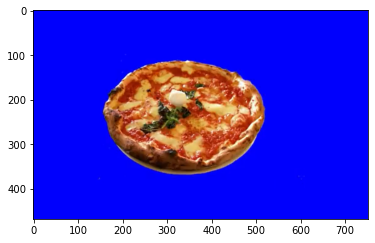

In [16]:
pizza = cv2.imread('./images/blue_screen.PNG')
pizza = cv2.cvtColor(pizza, cv2.COLOR_BGR2RGB)
plt.imshow(pizza, cmap='gray')

In [17]:
print(pizza.shape)

(468, 752, 3)


In [33]:
# thresholding
lower_blue = np.array([0,0,180])
upper_blue = np.array([50,90,255])

# create a mask
mask = cv2.inRange(pizza,lower_blue,upper_blue)

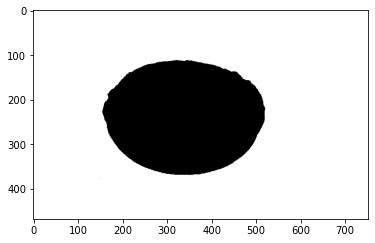

In [34]:
# you can plot the mask
plt.imshow(mask,cmap='gray')

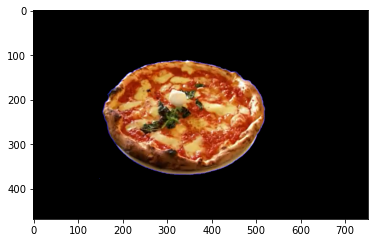

In [35]:
# make a copy of the image
masked_image = np.copy(pizza)

# mask on the image 0 - black
masked_image[mask != 0] = [0,0,0]

# plot 
plt.imshow(masked_image)

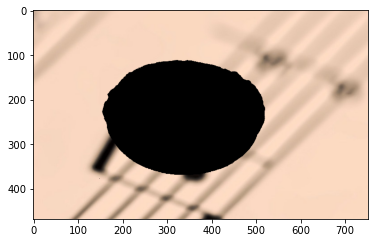

In [37]:
# add a background to the image
bkg_img = cv2.imread('./images/piano.jpg')
bkg_img = cv2.cvtColor(bkg_img, cv2.COLOR_BGR2RGB)

# crop the background image
cropped_bckg = bkg_img[0:468, 0:752]

# mask the cropped background
cropped_bckg[mask == 0] = [0,0,0]
plt.imshow(cropped_bckg)

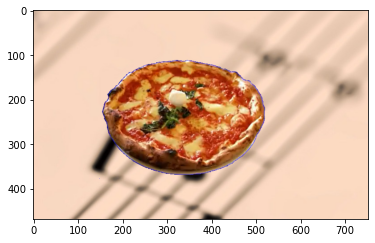

In [38]:
# add the two images together to form a complete image.

completed_image = cropped_bckg + masked_image
plt.imshow(completed_image)

### NOTE

OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage.

However, now the standard has changed and most image software and cameras use RGB format, which is why, in these examples, it's good practice to initially convert BGR images to RGB before analyzing or manipulating them.